Se importan las bibliotecas numpy para operaciones numéricas y make_circles de sklearn.datasets para generar un conjunto de datos de prueba con forma de círculos concéntricos.

In [1]:
import numpy as np
from sklearn.datasets import make_circles

np.random.seed(12345)
X, y = make_circles(noise=0.1, factor=0.1)

non_linear_transform = lambda x : np.stack((x[:, 0], x[:, 1], x[:, 0]**2 + x[:, 1]**2)).T

PhiX = non_linear_transform(X)

Se generan los datos usando make_circles. X contiene las coordenadas de los puntos y y sus etiquetas (0 o 1, representando a qué círculo pertenecen). noise controla la aleatoriedad en la posición de los puntos y factor la distancia entre los círculos.

Se define una función non_linear_transform que transforma los datos originales X a un espacio de mayor dimensión. En este caso, se añade una tercera columna que es la suma de los cuadrados de las dos primeras columnas. Esto permite que un clasificador lineal pueda separar los datos en el nuevo espacio. PhiX almacena los datos transformados.

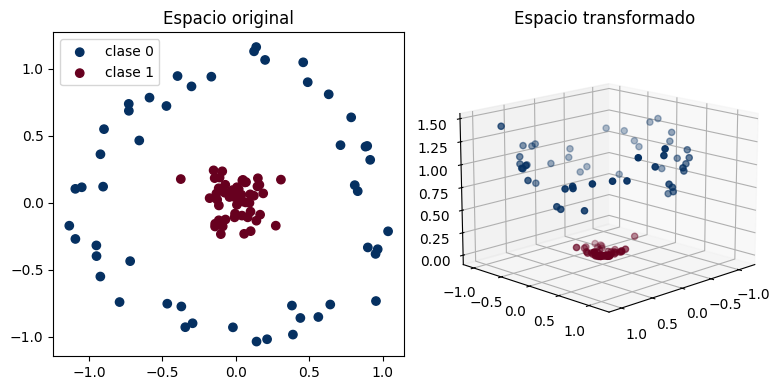

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.add_subplot(1, 2, 1)
for y_ in np.unique(y):
    ax.scatter(X[y==y_, 0], X[y==y_, 1], label=f'clase {y_}',
               c=y[y==y_], cmap=plt.cm.RdBu_r, vmin=0, vmax=1)
ax.set_title('Espacio original')
ax.legend()
ax = fig.add_subplot(1, 2, 2, projection='3d')
for y_ in np.unique(y):
    ax.scatter(PhiX[y==y_, 0], PhiX[y==y_, 1], PhiX[y==y_, 2],
               c=y[y==y_], cmap=plt.cm.RdBu_r, vmin=0, vmax=1)
ax.view_init(elev=15., azim=45)
ax.set_title('Espacio transformado');

Se importa matplotlib.pyplot para la visualización. %matplotlib inline asegura que las gráficas se muestren dentro del notebook.

Se crean dos subplots: uno para visualizar los datos originales X en 2D y otro para los datos transformados PhiX en 3D. Se usan scatter para representar los puntos y se colorean según su etiqueta (y).

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),
                      SVC(kernel='linear'))

model.fit(X, y);

Se importan las clases necesarias para crear y entrenar un modelo SVM (Support Vector Machine). SVC es el clasificador SVM, StandardScaler se usa para estandarizar los datos y make_pipeline para crear una secuencia de pasos en el proceso de modelado.

Se crea un modelo SVM con un kernel lineal y se entrena con los datos originales X y sus etiquetas y.

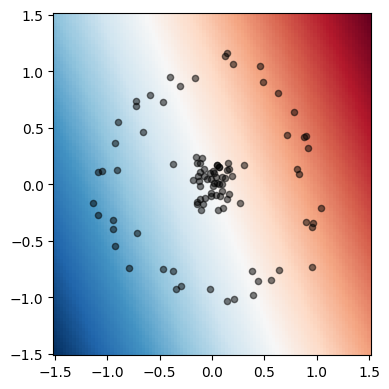

In [4]:
def plot_decision_boundary(model, ax, xmin=-1.5, xmax=1.5, title=None):
    x = np.linspace(xmin, xmax, num=100)
    xx, yy = np.meshgrid(x, x)
    hiperplane = model.decision_function(np.stack((xx.ravel(), yy.ravel())).T).reshape(xx.shape)

    ax.pcolormesh(xx, yy, hiperplane, cmap=plt.cm.RdBu_r)
    ax.scatter(X[:, 0], X[:,1], c='k', alpha=0.5, s=20)
    if title is not None:
        ax.set_title(title)

fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)
plot_decision_boundary(model, ax)

Se define una función plot_decision_boundary para visualizar la frontera de decisión del modelo SVM en el espacio original de los datos.

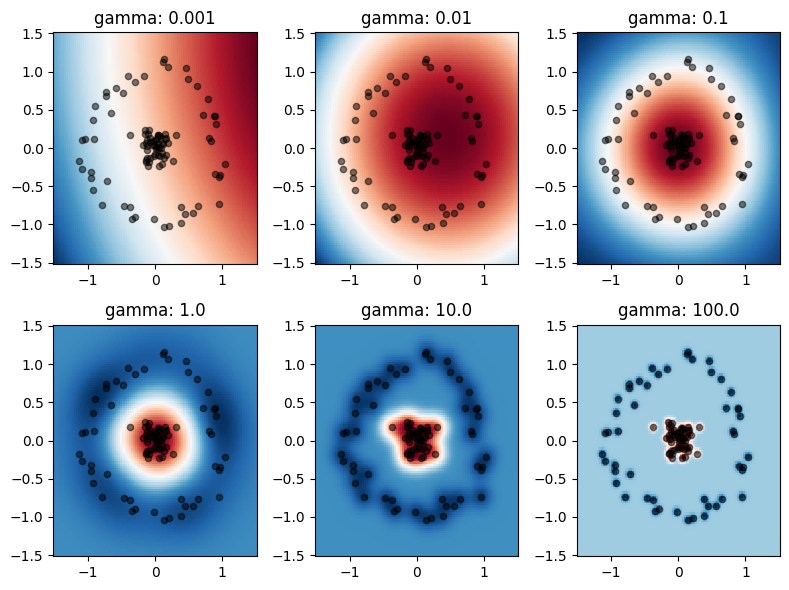

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

fig, ax = plt.subplots(2, 3, figsize=(8, 6), tight_layout=True)

for ax_, gamma_ in zip(ax.ravel(), [0.001, 0.01, 0.1, 1.0, 10., 100.]):
    model = make_pipeline(StandardScaler(),
                          SVC(C=1, kernel='rbf', gamma=gamma_))

    model.fit(X, y)
    plot_decision_boundary(model, ax_, title=f'gamma: {gamma_}')

In [6]:
model = make_pipeline(StandardScaler(), SVC())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

Se exploran diferentes valores del parámetro gamma del kernel RBF (Radial Basis Function) para el modelo SVM. Se crean varios subplots para visualizar cómo afecta gamma a la frontera de decisión.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [0.1, 1.0, 10.0, 100., 1000.],
              'svc__kernel': ['rbf'],
              'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10., 100.]}


validator = GridSearchCV(model, param_grid, cv=5)
validator.fit(X, y)
validator.best_params_

{'svc__C': 0.1, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}

Se usa GridSearchCV para buscar los mejores valores para los hiperparámetros del modelo SVM (C y gamma). Se define una grilla de valores a probar y GridSearchCV evalúa cada combinación usando validación cruzada.

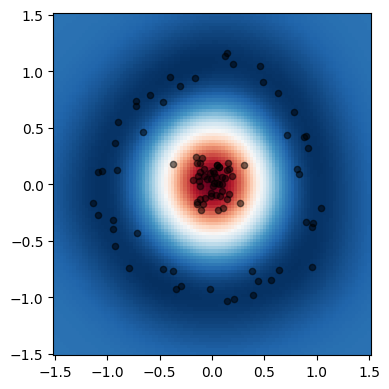

In [8]:
fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)
plot_decision_boundary(validator, ax)

Se visualiza la frontera de decisión del modelo SVM con los mejores hiperparámetros encontrados por GridSearchCV.